# Notebook: Minisat22 - Solución del Problema de Fichas

## Introducción al Algoritmo Minisat22

El envoltorio `SATsolver` utiliza el solver Minisat22 (y pycosat) para resolver problemas SAT de forma eficiente.

**Ventajas:**
- Muy eficiente para instancias grandes.
- Permite encontrar modelos o demostrar insatisfacibilidad.

**Limitaciones:**
- Requiere conversión a CNF (se hace automáticamente con `tseitin`).

En este notebook aplicamos Minisat22 al problema de las fichas (tablero 4x4, 3 figuras).
Usamos la clase `Fichas` de `Archivos/Proyecto.py` para obtener las 7 reglas y la función `SATsolver` para resolverlas.

In [1]:
import sys
import os
import time
sys.path.insert(0, os.path.abspath('.'))
sys.path.append('Archivos')
from Logica import *
from Proyecto import Fichas
from tseitin import tseitin
from minisat22 import SATsolver
import time
p = Fichas()
reglas = p.reglas
print('Número de reglas:', len(reglas))
for i, r in enumerate(reglas, start=1):
    print(f'Regla {i}:', str(r)[:120] + ('' if len(str(r))<120 else '...'))

Número de reglas: 7
Regla 1: (((((((((((((((ĠOĤ)OĨ)OĬ)Oġ)Oĥ)Oĩ)Oĭ)OĢ)OĦ)OĪ)OĮ)Oģ)Oħ)Oī)Oį)
Regla 2: (((((((((((((((ĀOĄ)OĈ)OČ)Oā)Oą)Oĉ)Oč)OĂ)OĆ)OĊ)OĎ)Oă)Oć)Oċ)Oď)
Regla 3: (((((((((((((((ĐOĔ)OĘ)OĜ)Ođ)Oĕ)Oę)Oĝ)OĒ)OĖ)OĚ)OĞ)Oē)Oė)Oě)Oğ)
Regla 4: ((((((((((((((ĀOĐ)OĠ)Oā)Ođ)Oġ)OĂ)OĒ)OĢ)Oă)Oē)Oģ)Y(((((((((((ĄOĔ)OĤ)Oą)Oĕ)Oĥ)OĆ)OĖ)OĦ)Oć)Oė)Oħ))Y(((((((((((ĈOĘ)OĨ)Oĉ)Oę)...
Regla 5: ((((((((((((((((((((((((((((((((((((((((((((((((Ā=Č)Y(Đ=Ĝ))Y(Ġ=Ĭ))Y(Ą=Ĉ))Y(Ĕ=Ę))Y(Ĥ=Ĩ))Y(Ĉ=Ą))Y(Ę=Ĕ))Y(Ĩ=Ĥ))Y(Č=Ā))Y(Ĝ=Đ...
Regla 6: ((((((((((((((((((((((((((((((((((((((((((((((((-ĀO-Đ)Y(-ĀO-Ġ))Y(-ĐO-Ġ))Y(-ĄO-Ĕ))Y(-ĄO-Ĥ))Y(-ĔO-Ĥ))Y(-ĈO-Ę))Y(-ĈO-Ĩ))Y(-...
Regla 7: ((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((-ĀO-ā)Y(-ĀO-Ă))Y(-ĀO-ă))Y(-āO-Ă))Y(-āO-ă))Y(-ĂO-...


## 1) Pruebas individuales por regla
Para cada regla (1..7) ejecutamos SATsolver y visualizamos el modelo encontrado (si existe).
Se registra el tiempo de ejecución.

Regla 1 - SAT: Satisfacible Tiempo(s): 0.003069


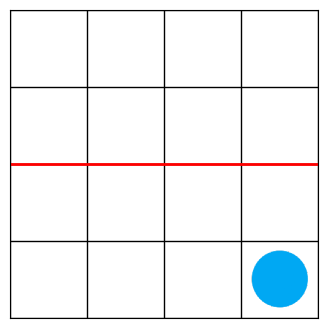

In [2]:
# Regla 1: al menos un círculo
A1 = reglas[0]
t0 = time.time()
res1, I1 = SATsolver(A1)
t1 = time.time()
print('Regla 1 - SAT:', res1, 'Tiempo(s):', round(t1-t0,6))
if res1 == 'Satisfacible':
    p.visualizar(I1)

Regla 2 - SAT: Satisfacible Tiempo(s): 0.001561


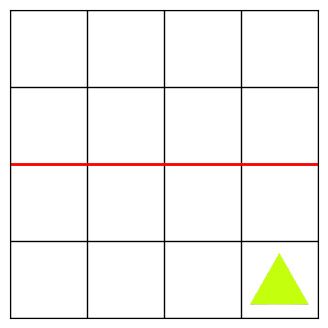

In [3]:
# Regla 2: al menos un triángulo
A2 = reglas[1]
t0 = time.time()
res2, I2 = SATsolver(A2)
t1 = time.time()
print('Regla 2 - SAT:', res2, 'Tiempo(s):', round(t1-t0,6))
if res2 == 'Satisfacible':
    p.visualizar(I2)

Regla 3 - SAT: Satisfacible Tiempo(s): 0.002154


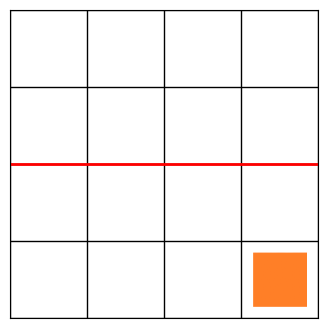

In [4]:
# Regla 3: al menos un cuadrado
A3 = reglas[2]
t0 = time.time()
res3, I3 = SATsolver(A3)
t1 = time.time()
print('Regla 3 - SAT:', res3, 'Tiempo(s):', round(t1-t0,6))
if res3 == 'Satisfacible':
    p.visualizar(I3)

Regla 4 - SAT: Satisfacible Tiempo(s): 0.002693


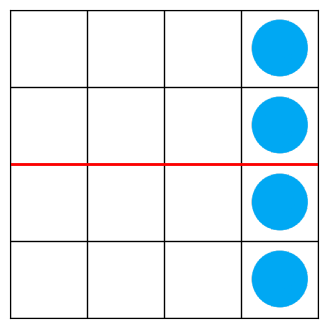

In [5]:
# Regla 4: no filas vacías
A4 = reglas[3]
t0 = time.time()
res4, I4 = SATsolver(A4)
t1 = time.time()
print('Regla 4 - SAT:', res4, 'Tiempo(s):', round(t1-t0,6))
if res4 == 'Satisfacible':
    p.visualizar(I4)

Regla 5 - SAT: Satisfacible Tiempo(s): 0.005249


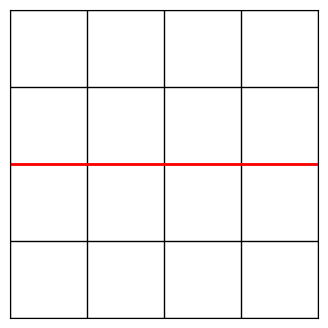

In [6]:
# Regla 5: simetría horizontal
A5 = reglas[4]
t0 = time.time()
res5, I5 = SATsolver(A5)
t1 = time.time()
print('Regla 5 - SAT:', res5, 'Tiempo(s):', round(t1-t0,6))
if res5 == 'Satisfacible':
    p.visualizar(I5)

Regla 6 - SAT: Satisfacible Tiempo(s): 0.006493


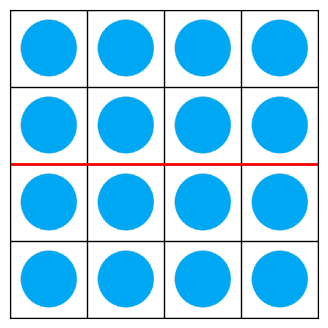

In [7]:
# Regla 6: solo una ficha por casilla
A6 = reglas[5]
t0 = time.time()
res6, I6 = SATsolver(A6)
t1 = time.time()
print('Regla 6 - SAT:', res6, 'Tiempo(s):', round(t1-t0,6))
if res6 == 'Satisfacible':
    p.visualizar(I6)

Regla 7 - SAT: Satisfacible Tiempo(s): 0.010582


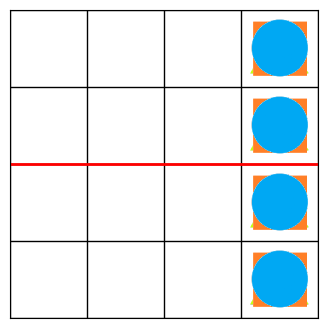

In [8]:
# Regla 7: no repetición de la misma figura en una fila
A7 = reglas[6]
t0 = time.time()
res7, I7 = SATsolver(A7)
t1 = time.time()
print('Regla 7 - SAT:', res7, 'Tiempo(s):', round(t1-t0,6))
if res7 == 'Satisfacible':
    p.visualizar(I7)

## 2) Conjunciones progresivas de reglas
Probamos todas las combinaciones progresivas de reglas (1+2, 1+2+3, 1-4, 1-5, 1-6, 1-7).
Se usa conjunción lógica (`Y`) entre las reglas para forzar que todas se cumplan simultáneamente.

1+2 - SAT: Satisfacible Tiempo(s): 0.00234


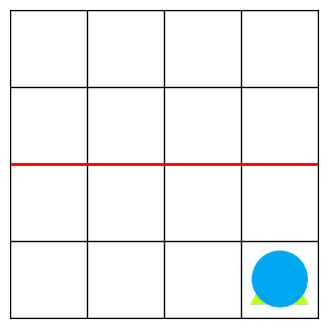

In [9]:
# Combinación 1+2
from Archivos.Logica import Ytoria
comb_12 = Ytoria([reglas[0], reglas[1]])
t0 = time.time()
res_12, I_12 = SATsolver(comb_12)
t1 = time.time()
print('1+2 - SAT:', res_12, 'Tiempo(s):', round(t1-t0,6))
if res_12 == 'Satisfacible':
    p.visualizar(I_12)

1+2+3 - SAT: Satisfacible Tiempo(s): 0.002678


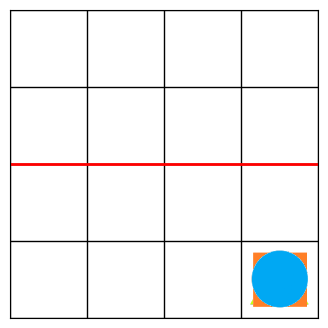

In [10]:
# Combinación 1+2+3
comb_123 = Ytoria([reglas[0], reglas[1], reglas[2]])
t0 = time.time()
res_123, I_123 = SATsolver(comb_123)
t1 = time.time()
print('1+2+3 - SAT:', res_123, 'Tiempo(s):', round(t1-t0,6))
if res_123 == 'Satisfacible':
    p.visualizar(I_123)

1-4 - SAT: Satisfacible Tiempo(s): 0.003524


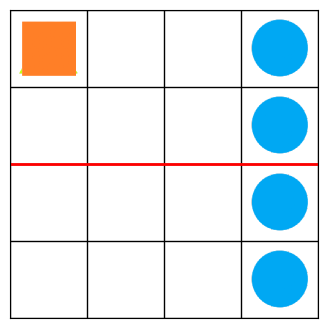

In [11]:
# Combinación 1-4 (1..4)
comb_1_4 = Ytoria([reglas[0], reglas[1], reglas[2], reglas[3]])
t0 = time.time()
res_1_4, I_1_4 = SATsolver(comb_1_4)
t1 = time.time()
print('1-4 - SAT:', res_1_4, 'Tiempo(s):', round(t1-t0,6))
if res_1_4 == 'Satisfacible':
    p.visualizar(I_1_4)

1-5 - SAT: Satisfacible Tiempo(s): 0.007537


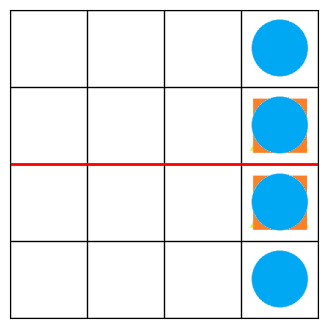

In [12]:
# Combinación 1-5 (1..5)
comb_1_5 = Ytoria([reglas[0], reglas[1], reglas[2], reglas[3], reglas[4]])
t0 = time.time()
res_1_5, I_1_5 = SATsolver(comb_1_5)
t1 = time.time()
print('1-5 - SAT:', res_1_5, 'Tiempo(s):', round(t1-t0,6))
if res_1_5 == 'Satisfacible':
    p.visualizar(I_1_5)

1-6 - SAT: Satisfacible Tiempo(s): 0.014598


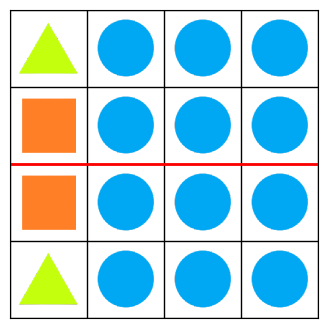

In [13]:
# Combinación 1-6 (1..6)
comb_1_6 = Ytoria([reglas[0], reglas[1], reglas[2], reglas[3], reglas[4], reglas[5]])
t0 = time.time()
res_1_6, I_1_6 = SATsolver(comb_1_6)
t1 = time.time()
print('1-6 - SAT:', res_1_6, 'Tiempo(s):', round(t1-t0,6))
if res_1_6 == 'Satisfacible':
    p.visualizar(I_1_6)

1-7 - SAT: Satisfacible Tiempo(s): 0.031991


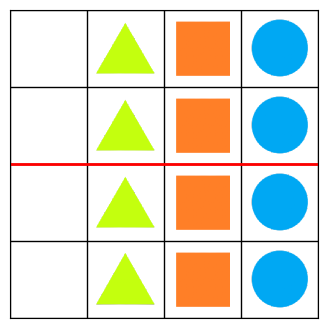

In [16]:
# Combinación 1-7 (todas)
comb_1_7 = Ytoria(reglas)
t0 = time.time()
res_1_7, I_1_7 = SATsolver(comb_1_7)
t1 = time.time()
print('1-7 - SAT:', res_1_7, 'Tiempo(s):', round(t1-t0,6))
if res_1_7 == 'Satisfacible':
    p.visualizar(I_1_7)

## 3) Resultado completo (Reglas 1-7)
Ejecutamos SATsolver sobre la conjunción de todas las reglas y mostramos el tiempo y la visualización final.

Todas las reglas: SAT= Satisfacible Tiempo(s)= 0.031046


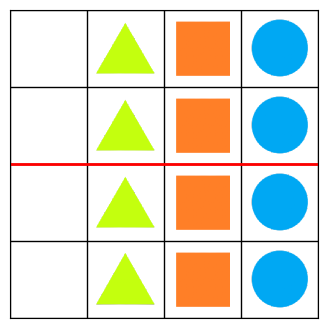

In [17]:
all_formula = Ytoria(reglas)
t0 = time.time()
res_all, I_all = SATsolver(all_formula)
t1 = time.time()
print('Todas las reglas: SAT=', res_all, 'Tiempo(s)=', round(t1-t0,6))
if res_all == 'Satisfacible':
    try:
        p.visualizar(I_all)
    except Exception as e:
        print('Error al visualizar la solución completa:', e)

## 4) Análisis de resultados
